

# Project #2: Gapminder World Data Analysis for four indicator 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Gapminder has collected a lot of information about how people live their lives in dierent countries, tracked across the years, and on a number of dierent indicators. For this project, I woluld select three indicators to investigate.
>
> the three indicators are: 
    > - co2: Carbone dioxide emissions from the burning of fossil fuels (metric tonnes of CO2 per person).
    > - income: Gross domestic product per person adjusted for differences in purchasing power
    > - murder: Mortailty due to interpersonal violence, per 100000 standard population, age adjusted. This rate is calculated as if all countries had the same age composition of the population.
    
> The two question that a would like to investigate is how does the co2 change in egypt compare to global and what is the relation between the number of murder and the income.

In [440]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [441]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')
print('This is the orignal data for co2: \n\n')
print(df_co2)

###############################################################################################
#  chocing comun years between all the data sets that I have, which will be from 1960 to 2014 #
###############################################################################################

df_co2 = df_co2.iloc[:, np.r_[0, 171:216]]

#########################################
#  moving the years from column to rows #
#########################################

df_co2 = df_co2.melt(id_vars=["country"], var_name="year", value_name="co2")

#########################################
#       resort the data by country      #
#########################################

df_co2 = df_co2.sort_values(['country', 'year'], ignore_index= True)
df_co2

This is the orignal data for co2: 


         country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0    Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1        Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2        Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3        Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
..           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
187    Venezuela   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
188      Vietnam   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
189        Yemen   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
190       Zambia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
191     Zimbabwe   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

       2005   

,country,year,co2
0,Afghanistan,1970,0.150
1,Afghanistan,1971,0.165
2,Afghanistan,1972,0.130
3,Afghanistan,1973,0.135
4,Afghanistan,1974,0.154
...,...,...,...
8635,Zimbabwe,2010,0.613
8636,Zimbabwe,2011,0.742
8637,Zimbabwe,2012,0.594
8638,Zimbabwe,2013,0.875


In [442]:
df_in = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
print('This is the orignal data fo income: \n\n')
print(df_in.head(200))

###############################################################################################
#  chocing comun years between all the data sets that I have, which will be from 1960 to 2014 #
###############################################################################################

df_in = df_in.iloc[:, np.r_[0, 171:216]]

#########################################
#  moving the years from column to rows #
#########################################

df_in = df_in.melt(id_vars=["country"], var_name="year", value_name="income")

#########################################
#       resort the data by country      #
#########################################

df_in = df_in.sort_values(['country', 'year'], ignore_index= True)
df_in

This is the orignal data fo income: 


         country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0    Afghanistan   603   603   603   603   603   603   603   603   603  ...   
1        Albania   667   667   667   667   667   668   668   668   668  ...   
2        Algeria   715   716   717   718   719   720   721   722   723  ...   
3        Andorra  1200  1200  1200  1200  1210  1210  1210  1210  1220  ...   
4         Angola   618   620   623   626   628   631   634   637   640  ...   
..           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
188    Venezuela  1210  1200  1200  1190  1190  1180  1170  1170  1160  ...   
189      Vietnam   778   778   778   778   778   778   778   778   778  ...   
190        Yemen   877   879   882   884   887   889   892   894   897  ...   
191       Zambia   663   665   667   668   670   671   673   675   676  ...   
192     Zimbabwe   869   870   871   872   873   874   875   876   877  ...   

      2031  

,country,year,income
0,Afghanistan,1970,2570
1,Afghanistan,1971,2500
2,Afghanistan,1972,2030
3,Afghanistan,1973,2030
4,Afghanistan,1974,2080
...,...,...,...
8680,Zimbabwe,2010,1930
8681,Zimbabwe,2011,2170
8682,Zimbabwe,2012,2490
8683,Zimbabwe,2013,2490


In [443]:
df_m = pd.read_csv('murder_per_100000_people.csv')
print('This is the orignal data fo murder: \n\n')
print(df_m.head())

###############################################################################################
#  chocing comun years between all the data sets that I have, which will be from 1960 to 2014 #
###############################################################################################

df_m = df_m.iloc[:, np.r_[0, 21:66]]

#########################################
#  moving the years from column to rows #
#########################################

df_m = df_m.melt(id_vars=["country"], var_name="year", value_name="murder")

#########################################
#       resort the data by country      #
#########################################

df_m = df_m.sort_values(['country', 'year'], ignore_index= True)
df_m

This is the orignal data fo murder: 


               country  1950  1951  1952  1953  1954  1955  1956  1957  1958  \
0              Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  Antigua and Barbuda   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2            Argentina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3              Armenia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4            Australia   1.0  1.33  1.46  1.25   1.3  1.39   1.3  1.34  1.54   

   ...   2007  2008  2009  2010  2011  2012  2013   2014  2015  2016  
0  ...  3.070  2.96   NaN  2.30   NaN   NaN   NaN    NaN   NaN   NaN  
1  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN  
2  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN  
3  ...    NaN  1.69   NaN   NaN   NaN  1.51  1.10  0.964  1.12  1.01  
4  ...  0.978  1.09  1.17  1.01  1.05  1.23  1.06  1.020  1.11   NaN  

[5 rows x 68 columns]


,country,year,murder
0,Albania,1970,NaN
1,Albania,1971,NaN
2,Albania,1972,NaN
3,Albania,1973,NaN
4,Albania,1974,NaN
...,...,...,...
4630,Venezuela,2010,NaN
4631,Venezuela,2011,NaN
4632,Venezuela,2012,NaN
4633,Venezuela,2013,NaN


In [444]:
# here we combine the three dataFram
df_com = df_co2.merge(df_in, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_com = df_com.merge(df_m, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_com

,country,year,co2,income,murder
0,Albania,1970,1.74,3570,NaN
1,Albania,1971,1.98,3710,NaN
2,Albania,1972,2.50,3860,NaN
3,Albania,1973,2.29,4050,NaN
4,Albania,1974,1.84,4070,NaN
...,...,...,...,...,...
4630,Venezuela,2010,6.65,16900,NaN
4631,Venezuela,2011,6.12,17300,NaN
4632,Venezuela,2012,6.77,18000,NaN
4633,Venezuela,2013,6.18,18000,NaN


# Cleaning

> In next cell I would like to see what is missing in the data and what is the best way to clean it

## First : 
>  checking the missing value

In [445]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 4634
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4635 non-null   object 
 1   year     4635 non-null   object 
 2   co2      4448 non-null   float64
 3   income   4635 non-null   int64  
 4   murder   2310 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 217.3+ KB


> it is clear there are missing data in murder

>

> let see from the graph what is the better solution to fix it

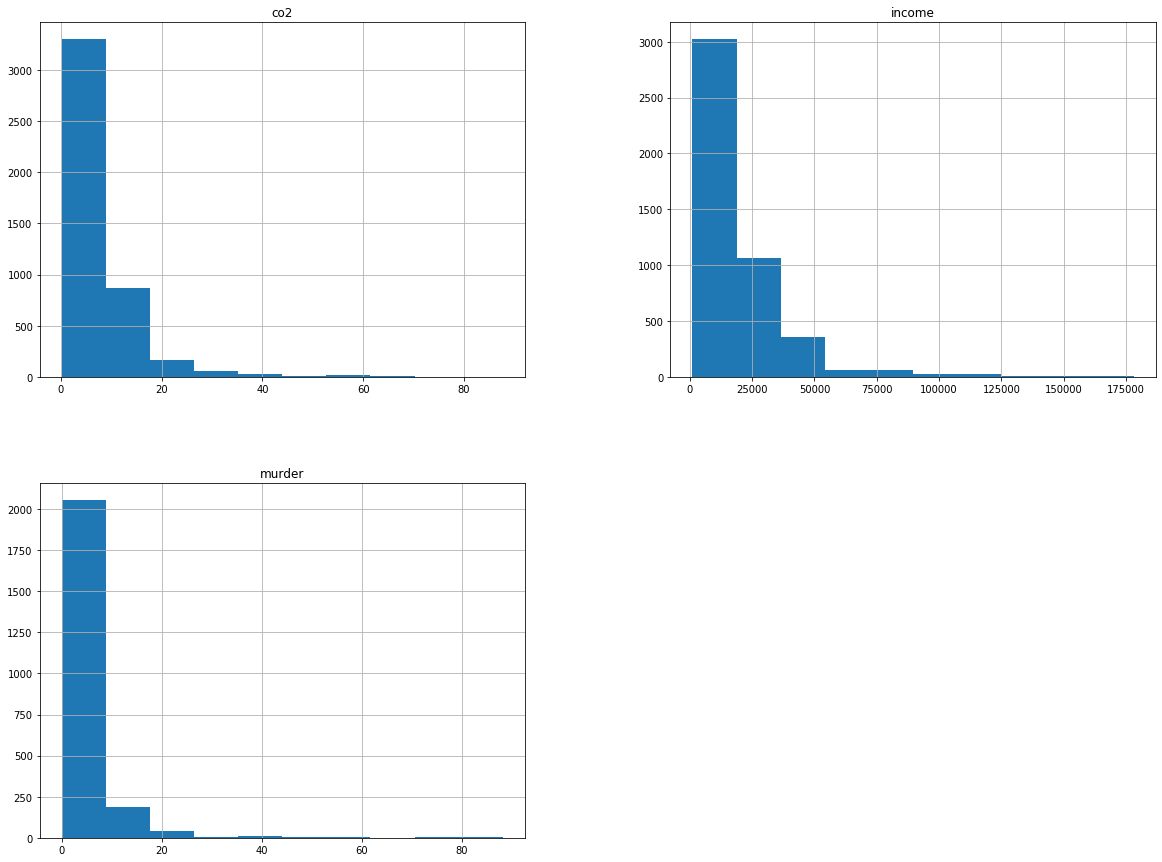

In [446]:
df_com.hist(figsize=(20,15));

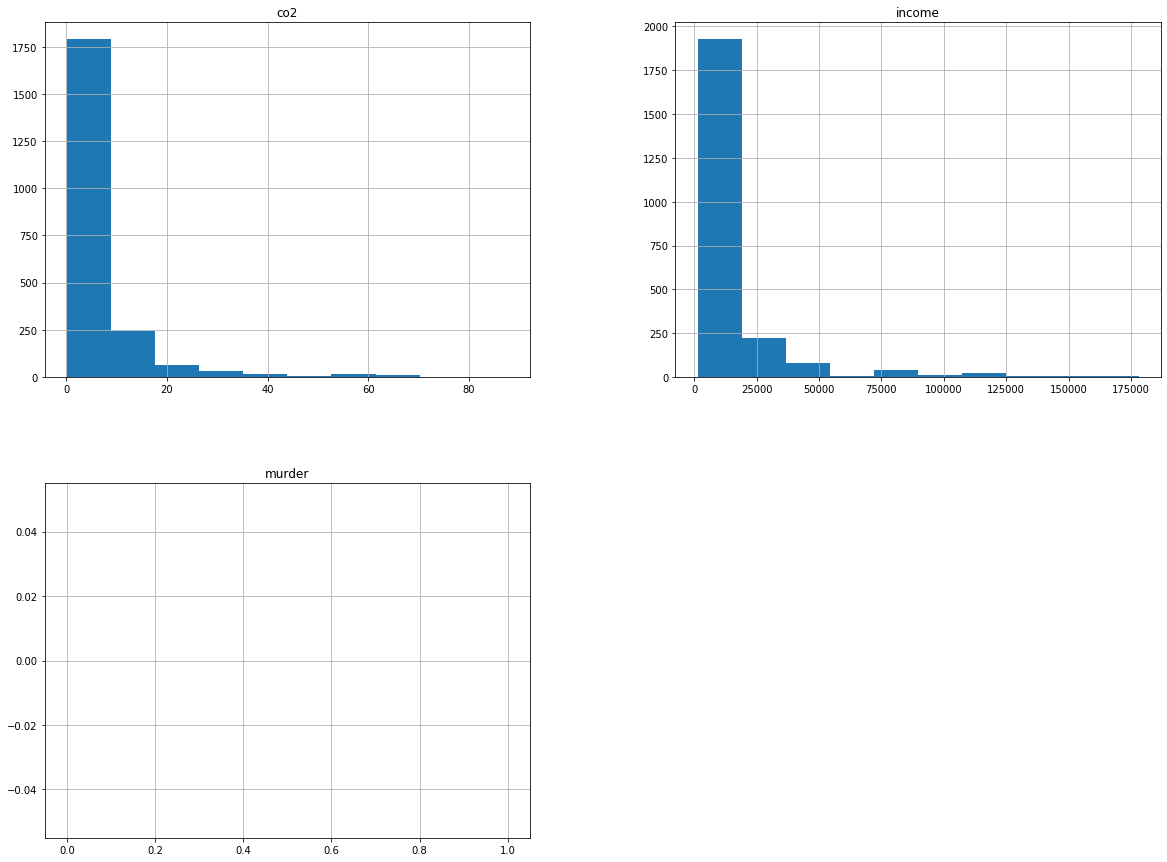

In [447]:
df_com[df_com.murder.isnull()].hist(figsize=(20,15));

> we can see from graph that if we replace it by the mean it will not affect our analysis much

In [448]:
# replace the nan value in murder by the mean
df_com.fillna(df_com.mean(), inplace= True)
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 4634
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4635 non-null   object 
 1   year     4635 non-null   object 
 2   co2      4635 non-null   float64
 3   income   4635 non-null   int64  
 4   murder   4635 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 217.3+ KB


## Done from missing value


## Second
> check if there are a duplicated row

In [449]:
sum(df_com.duplicated())

0

> Good , there is no duplicated row

## Third

> check the data type of the coulmns


In [450]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 4634
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4635 non-null   object 
 1   year     4635 non-null   object 
 2   co2      4635 non-null   float64
 3   income   4635 non-null   int64  
 4   murder   4635 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 217.3+ KB


> we can see the year coulmn is of type object(str), it is better if it is int 


In [451]:
#convert datatype of year to int
df_com['year'] = df_com['year'].astype(int)
df_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 4634
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4635 non-null   object 
 1   year     4635 non-null   int32  
 2   co2      4635 non-null   float64
 3   income   4635 non-null   int64  
 4   murder   4635 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 199.2+ KB


> done from convert

## Done from cleaning 
--------------------------------------------------------------------

<a id='eda'></a>
## Exploratory Data Analysis



###  Question 1: In Egypt, Dose the co2 increase or decrease? Compare it with gloabl co2.

In [452]:

#finding what is the mean of co2 in Egypt
egypt_co2_mean = df_com.query("country == 'Egypt'")['co2'].mean()
egypt_co2_mean

1.5613111111111115

In [453]:
#finding what is the mean of co2 in all data
df_com['co2'].mean()

7.035961780575567

> we can see the co2 in Egypt is much lower than globaly 
>
> let see the co2 in 1970 & 2014 and how much it change for that years 

In [454]:
print ('The co2 in Egypt in 1970 = ' , df_com.query("country == 'Egypt' and year == '1970'")['co2'].values[0])
print ('The co2 in Egypt in 2014 = ' , df_com.query("country == 'Egypt' and year == '2014'")['co2'].values[0])

print ('The difftrant = ' , df_com.query("country == 'Egypt' and year == '2014'")['co2'].values[0] - df_com.query("country == 'Egypt' and year == '1970'")['co2'].values[0])

The co2 in Egypt in 1970 =  0.628
The co2 in Egypt in 2014 =  2.23
The difftrant =  1.6019999999999999


> in Egypt it increase by 1.6 

> Now let Visualize it how it changes via the year and compare it with globly

Text(0.5, 0, 'Year')

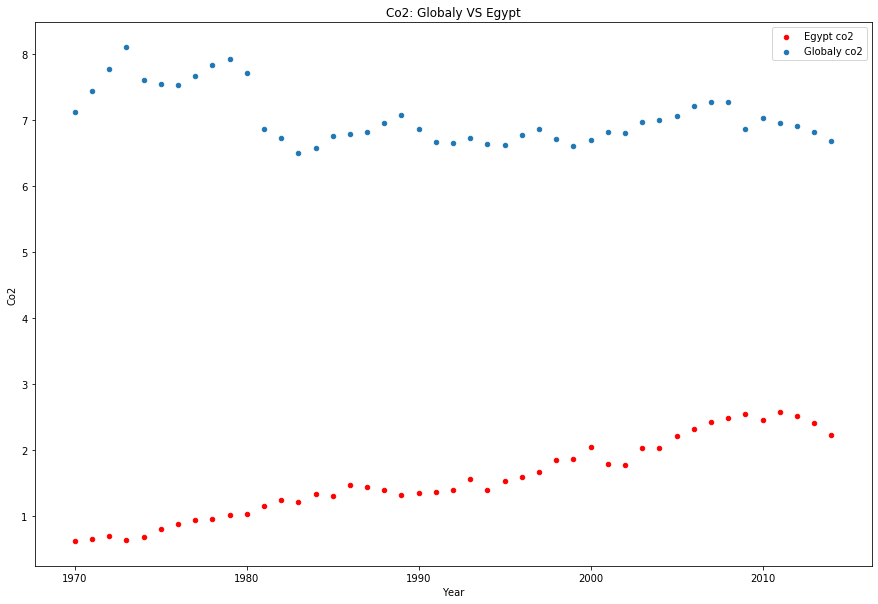

In [455]:
# here we find first the data for Egypt only then draw it
ax = df_com.query("country == 'Egypt'").plot(x='year', y = 'co2',label='Egypt co2', kind='scatter',color= 'red', figsize=(15,10))

# here we group hte data by year to find the gloably co2
df_com.groupby('year',as_index=False).mean().plot(x='year', y = 'co2',label='Globaly co2',title='Co2: Globaly VS Egypt', kind='scatter',figsize=(15,10), ax= ax);
ax.set_ylabel("Co2")
ax.set_xlabel("Year")

> we can notes that the co2 globaly is higher than in Egypt
>
> also globaly it remaine in same renage, but in Egypt it increase

### Question 2: What is the relation between murder and income? comment on the result. 

> here we want a graph for the murder and income to what is the relation between them

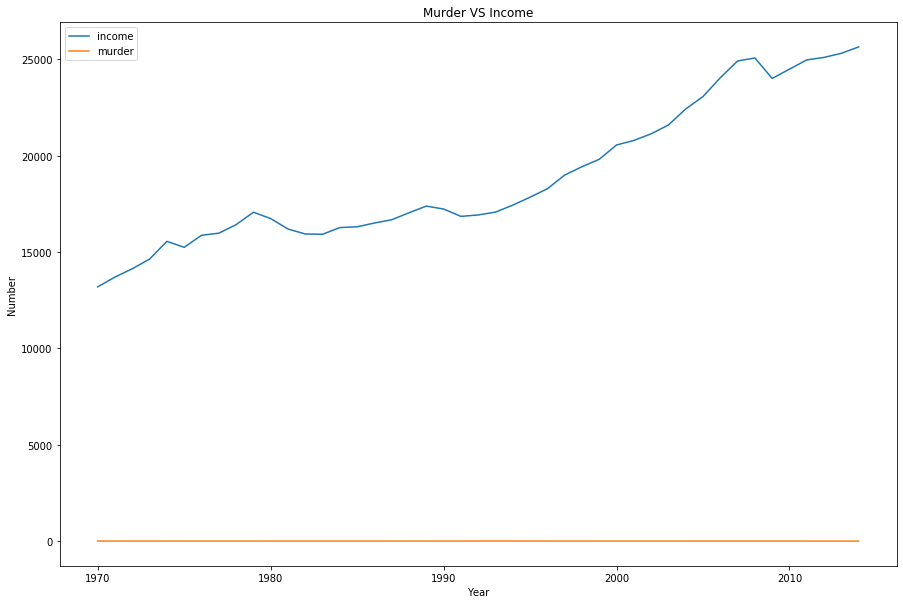

In [456]:
#define a function to draw a line graph for murder and income
def DrawLineGraph (df, ylabel):
    ax = df.groupby('year', as_index= False).mean().plot(x='year', y = 'income',title= 'Murder VS Income', kind='line',figsize=(15,10))
    df.groupby('year', as_index= False).mean().plot(x='year', y = 'murder', kind='line',figsize=(15,10), ax= ax);
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Year")

#draw a grahp using the function
DrawLineGraph(df_com , 'Number')



> !!!! it is not clear from this graph, the murder number is much lower than income 
>
> we need to make it in persentage to see the relation  better

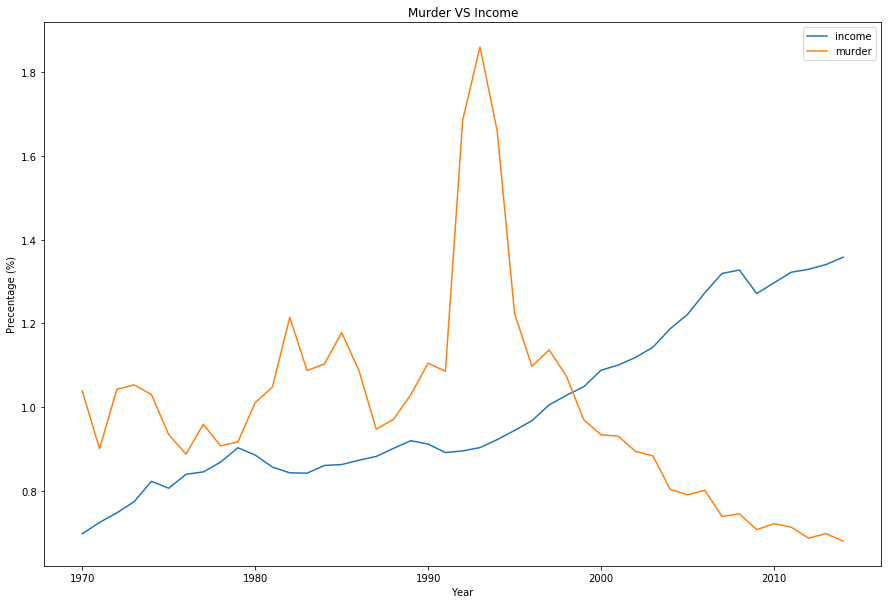

In [457]:
#define a function to convert the column to percenteage

def convertToPrecentage (column):
    mean = df_com.groupby('year').mean()[column].mean()
    df_year = df_com.groupby('year', as_index=False).mean()
    df_com[column] = df_com[column]  / mean

# convert the income and murder 
convertToPrecentage('income')
convertToPrecentage('murder')

# using the function defined above
DrawLineGraph(df_com , 'Precentage (%)')



> we can see from the graph in 1998 the income increase and the number of murder decrease

<a id='conclusions'></a>
## Conclusions



>  - we did the analysis for three indicators, we find it have some relation between it but we can not there are not other indicators affect it.
>
> - in the first question we found the co2 in Egypt is lower than the gloabl co2
>
> - in second question found that once the income increase the number of murder decrease

### what will make our analysis better

> we drop some country because we do not have a data for it, that may affect our analysis, if we it it would be better
>
> also, we choose only 55 year, it would be better if we did it for longer period.
>
> moreover, adding more indicators the see the affect on other indicators.

## References 
> - pandas documntation website.